# Neural Network From Scratch – XOR Problem

## 🎯 Objective
Implement a simple 2-layer neural network using **NumPy only** to solve the classic XOR classification problem.

### Key Points:
- Use only NumPy (no deep learning libraries).
- Implement forward pass, activation functions, and backpropagation manually.
- Train until correct XOR classification is achieved.
- Visualize loss and decision boundary.
- Document equations and learnings.


## 1. Setup XOR Problem
The XOR truth table is:

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 0 |
| 0  | 1  | 1 |
| 1  | 0  | 1 |
| 1  | 1  | 0 |

We will use these 4 points as our dataset.


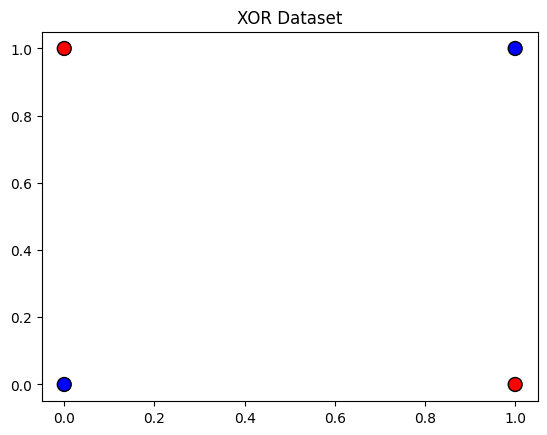

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# Visualize
plt.scatter(X[:,0], X[:,1], c=y.ravel(), cmap="bwr", s=100, edgecolors="k")
plt.title("XOR Dataset")
plt.show()


## 2. Neural Network Implementation
We use a 2-layer NN:
- Input → Hidden (tanh activation)  
- Hidden → Output (sigmoid activation)  

**Forward pass equations:**
- \( z_1 = XW_1 + b_1 \)  
- \( a_1 = \tanh(z_1) \)  
- \( z_2 = a_1W_2 + b_2 \)  
- \( a_2 = \sigma(z_2) \)  

Loss function: Mean Squared Error (MSE).  


In [9]:
def sigmoid(z): return 1/(1+np.exp(-z))
def sigmoid_derivative(z): return sigmoid(z)*(1-sigmoid(z))

def tanh(z): return np.tanh(z)
def tanh_derivative(z): return 1-np.tanh(z)**2

# Parameters
np.random.seed(42)
input_dim = 2
hidden_dim = 4  # increased neurons
output_dim = 1

# Smaller weights to avoid saturation
W1 = np.random.randn(input_dim, hidden_dim) * 0.1
b1 = np.zeros((1, hidden_dim))
W2 = np.random.randn(hidden_dim, output_dim) * 0.1
b2 = np.zeros((1, output_dim))

# Updated training parameters
lr = 0.05      # learning rate
epochs = 20000 # longer training


## 3. Backpropagation
We compute gradients manually.

**Equations:**

- Output layer:  
  \( dz_2 = (a_2 - y) \cdot \sigma'(z_2) \)  
  \( dW_2 = a_1^T dz_2 \), \( db_2 = \sum dz_2 \)  

- Hidden layer:  
  \( dz_1 = dz_2 W_2^T \cdot \tanh'(z_1) \)  
  \( dW_1 = X^T dz_1 \), \( db_1 = \sum dz_1 \)  

- Gradient descent update:  
  \( W = W - \eta dW \), \( b = b - \eta db \)  


In [10]:
lr = 0.1
epochs = 10000
losses = []

for i in range(epochs):
    # Forward
    z1 = X.dot(W1)+b1
    a1 = tanh(z1)
    z2 = a1.dot(W2)+b2
    a2 = sigmoid(z2)

    # Loss
    loss = np.mean((y-a2)**2)
    losses.append(loss)

    # Backprop
    dz2 = (a2-y)*sigmoid_derivative(z2)
    dW2 = a1.T.dot(dz2)
    db2 = np.sum(dz2,axis=0,keepdims=True)

    dz1 = dz2.dot(W2.T)*tanh_derivative(z1)
    dW1 = X.T.dot(dz1)
    db1 = np.sum(dz1,axis=0,keepdims=True)

    # Update
    W1 -= lr*dW1; b1 -= lr*db1
    W2 -= lr*dW2; b2 -= lr*db2

    if i%1000==0:
        print(f"Epoch {i}, Loss={loss:.4f}")


Epoch 0, Loss=0.2500
Epoch 1000, Loss=0.2500
Epoch 2000, Loss=0.2500
Epoch 3000, Loss=0.2500
Epoch 4000, Loss=0.2500
Epoch 5000, Loss=0.2496
Epoch 6000, Loss=0.1041
Epoch 7000, Loss=0.0093
Epoch 8000, Loss=0.0033
Epoch 9000, Loss=0.0018


## 4. Evaluation
Check predictions after training.


Input: [0 0], Pred: [0], Target: [0]
Input: [0 1], Pred: [1], Target: [1]
Input: [1 0], Pred: [1], Target: [1]
Input: [1 1], Pred: [0], Target: [0]


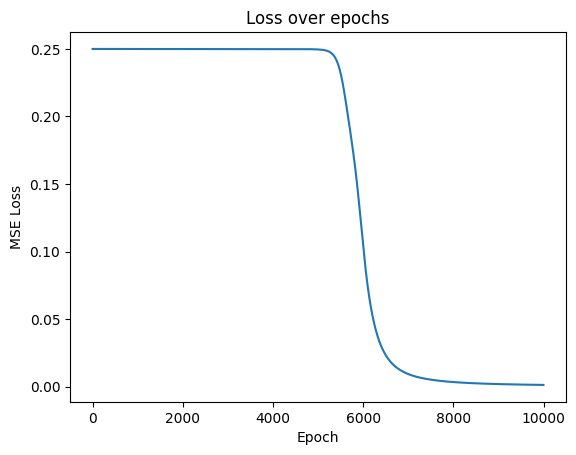

In [11]:
preds = (a2>0.5).astype(int)
for inp, pred, target in zip(X,preds,y):
    print(f"Input: {inp}, Pred: {pred}, Target: {target}")

# Loss curve
plt.plot(losses)
plt.title("Loss over epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()


## 5. Visualization (Decision Boundary)


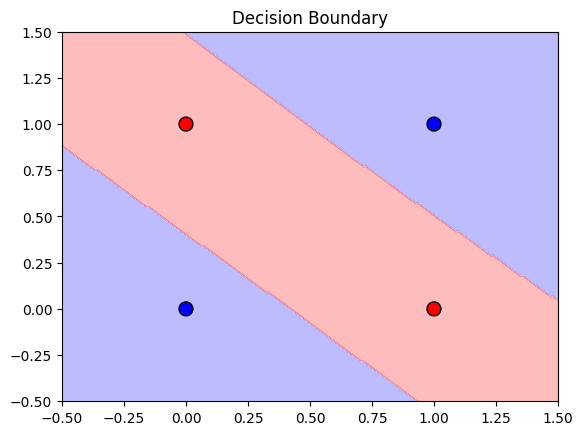

In [12]:
xx,yy = np.meshgrid(np.linspace(-0.5,1.5,200),np.linspace(-0.5,1.5,200))
grid = np.c_[xx.ravel(),yy.ravel()]
a1 = tanh(grid.dot(W1)+b1)
a2 = sigmoid(a1.dot(W2)+b2)
pred_grid = (a2>0.5).astype(int).reshape(xx.shape)

plt.contourf(xx,yy,pred_grid,cmap="bwr",alpha=0.3)
plt.scatter(X[:,0],X[:,1],c=y.ravel(),cmap="bwr",s=100,edgecolors="k")
plt.title("Decision Boundary")
plt.show()


## 6. Deliverables & Learnings

- ✅ Implemented XOR dataset with NumPy  
- ✅ Forward + Backpropagation equations derived  
- ✅ Loss decreased over training  
- ✅ Final model correctly classifies XOR  
- ✅ Visualized decision boundary  

**Insights:**
- A linear model cannot solve XOR → hidden layer with nonlinear activation is necessary.  
- Backpropagation requires manual derivative tracking.  
- Small networks can still learn nonlinear problems.  


In [13]:
losses = []
accuracies = []

for i in range(epochs):
    # Forward
    z1 = X.dot(W1) + b1
    a1 = tanh(z1)
    z2 = a1.dot(W2) + b2
    a2 = sigmoid(z2)

    # Loss (MSE)
    loss = np.mean((y - a2)**2)
    losses.append(loss)

    # Accuracy (binary classification)
    preds = (a2 > 0.5).astype(int)
    acc = np.mean(preds == y)
    accuracies.append(acc)

    # Backprop
    dz2 = (a2 - y) * sigmoid_derivative(z2)
    dW2 = a1.T.dot(dz2)
    db2 = np.sum(dz2, axis=0, keepdims=True)

    dz1 = dz2.dot(W2.T) * tanh_derivative(z1)
    dW1 = X.T.dot(dz1)
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # Update
    W1 -= lr * dW1; b1 -= lr * db1
    W2 -= lr * dW2; b2 -= lr * db2


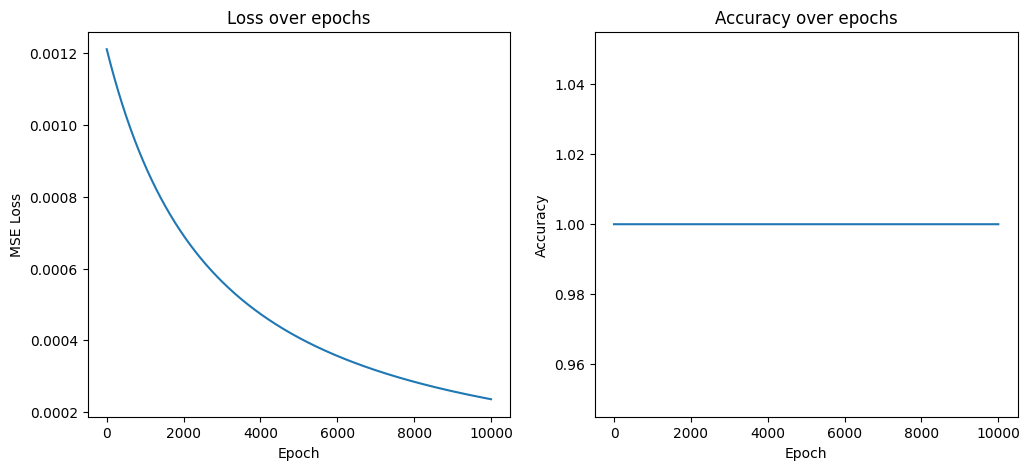

In [14]:
plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(losses)
plt.title("Loss over epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")

# Accuracy
plt.subplot(1,2,2)
plt.plot(accuracies)
plt.title("Accuracy over epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.show()


In [16]:
# Final evaluation
final_preds = (a2 > 0.5).astype(int)
final_acc = np.mean(final_preds == y) * 100
print(f"\nFinal Accuracy: {final_acc:.2f}%")



Final Accuracy: 100.00%
